In [ ]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from matplotlib.pyplot import figure
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.dates as mdates
from sklearn import linear_model
from sklearn.model_selection import TimeSeriesSplit
from sklearn.svm import SVR
import plotly.graph_objs as go


In [ ]:
# Imported Sheet1 from GLDIND.xlsx
import pandas as pd
sheet_df_dictonary = pd.read_excel(r'/content/sample_data/Gold Prediction Dataset.xlsx', engine='openpyxl', sheet_name=['GoldMergedData'], skiprows=0)
GoldMergedData = sheet_df_dictonary['GoldMergedData']




# Data Discovery
## Data Basic Information

In [ ]:
GoldMergedData

,Date,Gold_Price,Gold_Open,Gold_High,Gold_Low,Silver_Price,Copper_Price,Brent_Oil,S&P_500,NASDAQ,DJI,US_10Y_Bond_Yield,CPI_Value,FED_Fund_Rate,US_Dollar_Index
0,2002-01-02,278.85,278.85,278.85,278.85,4.535,0.6580,21.00,1154.70,1979.25,10073.40,5.160,177.700,1.92,116.270
1,2002-01-03,278.45,278.85,278.45,278.45,4.608,0.6640,20.66,1165.30,2044.27,10172.14,5.111,177.700,1.72,116.540
2,2002-01-04,278.95,278.55,278.95,278.95,4.650,0.6745,22.18,1172.50,2059.38,10259.74,5.125,177.700,1.61,116.750
3,2002-01-07,278.75,278.90,278.75,278.75,4.667,0.7150,22.03,1164.90,2037.10,10197.05,5.049,177.700,1.61,116.970
4,2002-01-08,279.05,278.85,279.05,279.05,4.640,0.7085,22.02,1160.70,2055.74,10150.55,5.083,177.700,1.61,117.230
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5205,2021-12-28,1805.37,1811.84,1820.70,1804.38,23.121,4.4295,78.94,4786.36,15781.72,36398.21,1.484,280.126,0.08,96.168
5206,2021-12-29,1803.66,1805.59,1808.16,1788.94,22.858,4.4100,79.23,4793.06,15766.22,36488.63,1.556,280.126,0.08,95.886
5207,2021-12-30,1815.01,1803.99,1817.44,1795.78,23.060,4.3925,79.32,4778.73,15741.56,36398.08,1.507,280.126,0.08,95.919
5208,2021-12-31,1828.39,1815.44,1830.58,1814.15,23.352,4.4635,77.78,4766.18,15644.97,36338.30,1.512,280.126,0.07,95.553


In [ ]:
# display the dimension of the dataset
GoldMergedData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5210 entries, 0 to 5209
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date               5210 non-null   datetime64[ns]
 1   Gold_Price         5210 non-null   float64       
 2   Gold_Open          5210 non-null   float64       
 3   Gold_High          5210 non-null   float64       
 4   Gold_Low           5210 non-null   float64       
 5   Silver_Price       5108 non-null   float64       
 6   Copper_Price       5060 non-null   float64       
 7   Brent_Oil          5144 non-null   float64       
 8   S&P_500            5037 non-null   float64       
 9   NASDAQ             5037 non-null   float64       
 10  DJI                5037 non-null   float64       
 11  US_10Y_Bond_Yield  5133 non-null   float64       
 12  CPI_Value          5210 non-null   float64       
 13  FED_Fund_Rate      5210 non-null   float64       
 14  US_Dolla

In [ ]:
GoldMergedData["Gold_Price"].describe()

count    5210.000000
mean     1086.726305
std       472.060831
min       278.450000
25%       648.262500
50%      1208.990000
75%      1381.900000
max      2063.810000
Name: Gold_Price, dtype: float64

In [ ]:
def compute_daily_returns(df):
    """Compute and return the daily return values."""
    # TODO: Your code here
    # Note: Returned DataFrame must have the same number of rows
    daily_return = (df / df.shift(1)) - 1
    daily_return[0] = 0
    return daily_return

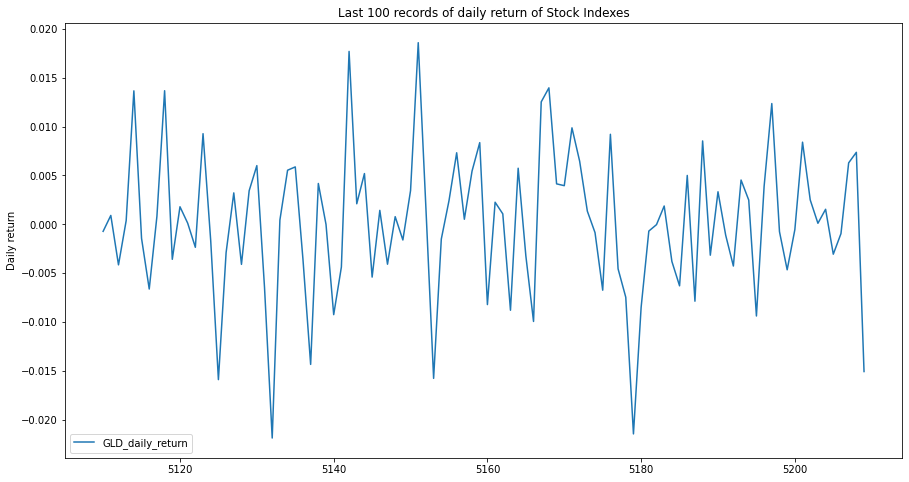

In [ ]:
GLD_daily_return = compute_daily_returns(GoldMergedData["Gold_Price"])
df_daily_return = pd.DataFrame({'GLD_daily_return':GLD_daily_return})

daily_ax = df_daily_return[-100:].plot(title='Last 100 records of daily return of Stock Indexes',figsize=(15,8))

daily_ax.set_ylabel('Daily return')
daily_ax.legend(loc='lower left')
plt.show()

Mean= 1086.7263051823415
Standard Deviation= 472.0608313132944
Kurtosis= -1.0778639135839214


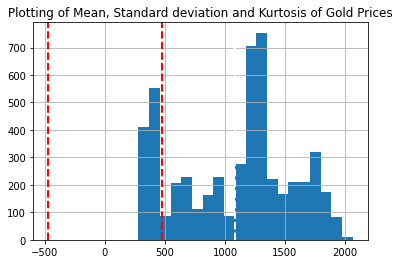

In [ ]:

# computing standard deviation of Gold stock
mean=GoldMergedData["Gold_Price"].mean()
std=GoldMergedData["Gold_Price"].std()
kurt=GoldMergedData["Gold_Price"].kurtosis()
print('Mean=',mean)
print('Standard Deviation=',std)
print('Kurtosis=',kurt)

#Plotting Histogram
GoldMergedData["Gold_Price"].hist(bins=20)

plt.axvline(mean, color='w',linestyle='dashed',linewidth=2)
plt.axvline(std, color='r',linestyle='dashed',linewidth=2)
plt.axvline(-std, color='r',linestyle='dashed',linewidth=2)
plt.title("Plotting of Mean, Standard deviation and Kurtosis of Gold Prices")
plt.show()

In [ ]:
print("Shape of the dataset: ", GoldMergedData.shape)
print("Length of the dataset: ", len(GoldMergedData))
print("Maximum closing price of gold during last twenty years: ", GoldMergedData["Gold_Price"].max())
print("Minimum closing price of gold during last twenty years: ", GoldMergedData["Gold_Price"].min())

Shape of the dataset:  (5210, 15)
Length of the dataset:  5210
Maximum closing price of gold during last twenty years:  2063.81
Minimum closing price of gold during last twenty years:  278.45


#  Data Cleaning
## Changing and Replace Values' Representation

In [ ]:
# Check Null values in the dataset
GoldMergedData.isnull().sum()

Date                   0
Gold_Price             0
Gold_Open              0
Gold_High              0
Gold_Low               0
Silver_Price         102
Copper_Price         150
Brent_Oil             66
S&P_500              173
NASDAQ               173
DJI                  173
US_10Y_Bond_Yield     77
CPI_Value              0
FED_Fund_Rate          0
US_Dollar_Index       67
dtype: int64

In [ ]:
GoldMergedData=GoldMergedData.dropna()

In [ ]:
# Check Null values in the dataset
GoldMergedData.isnull().sum()

Date                 0
Gold_Price           0
Gold_Open            0
Gold_High            0
Gold_Low             0
Silver_Price         0
Copper_Price         0
Brent_Oil            0
S&P_500              0
NASDAQ               0
DJI                  0
US_10Y_Bond_Yield    0
CPI_Value            0
FED_Fund_Rate        0
US_Dollar_Index      0
dtype: int64

# Exploratory Data Analysis

In [ ]:
# feature_columns = ['SMA_GLD20', 'Upper_band', 'Lower_band', 'SMA_GLD50',
#        'SMA_GLD200', 'SMA_H', 'MACD', 'MACD_S', 'MACD_H', 'RSI', 'STDEV',
#        'ROC']

econ_features = ['Gold_Price','Silver_Price', 'Copper_Price', 'Brent_Oil', 'S&P_500',
       'NASDAQ', 'DJI','US_10Y_Bond_Yield', 'CPI_Value', 'FED_Fund_Rate',
       'US_Dollar_Index']

### Correlation Analysis

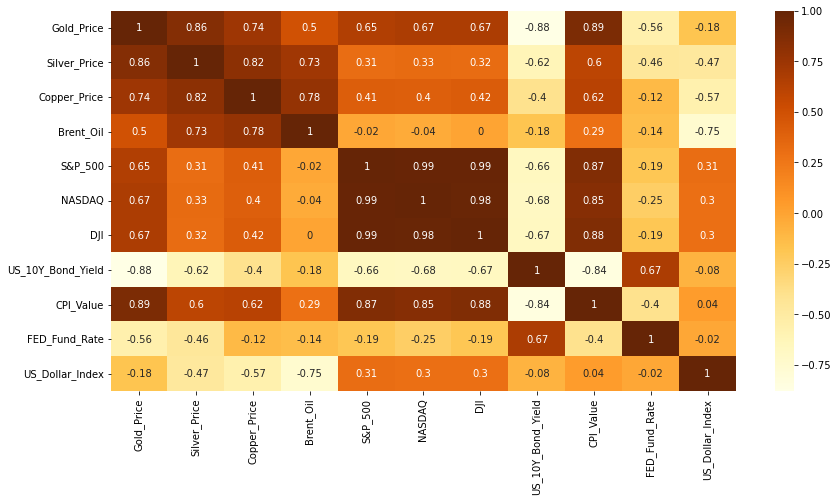

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns #seaborn is already installed
correlation = GoldMergedData[econ_features].corr().round(2)
plt.figure(figsize = (14,7))
sns.heatmap(correlation, annot = True, cmap = 'YlOrBr')

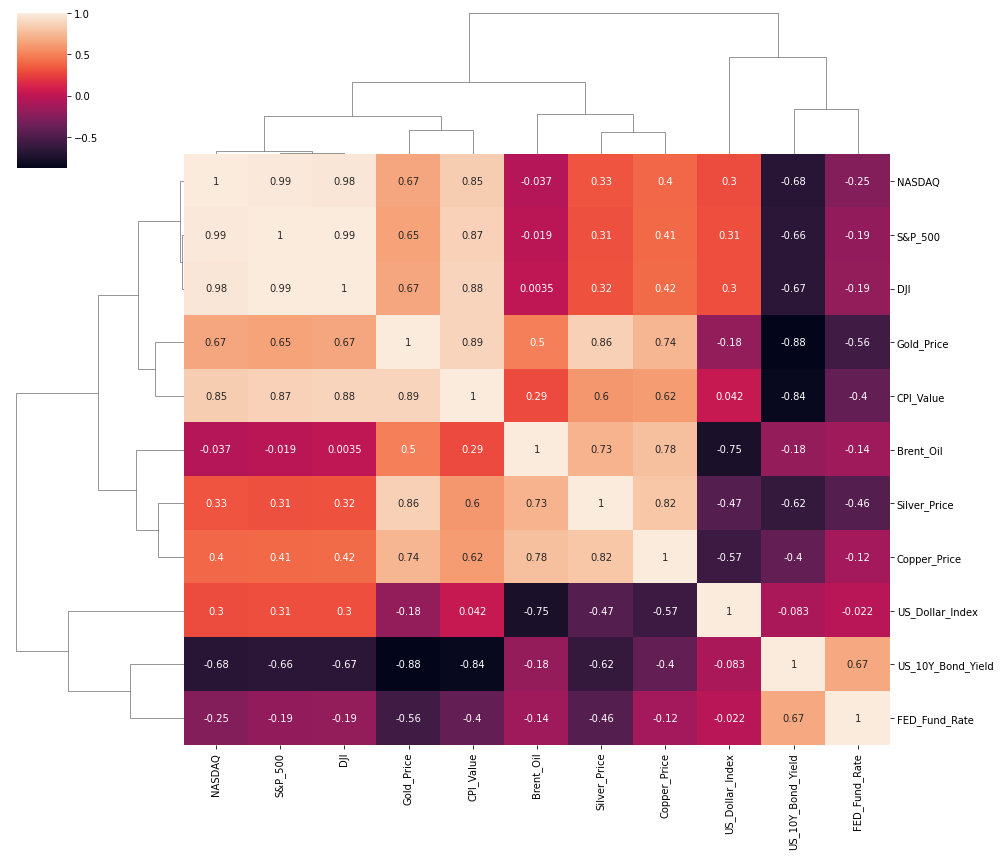

In [ ]:
sns.clustermap(GoldMergedData[econ_features].corr(),annot=True, figsize=(14, 12))

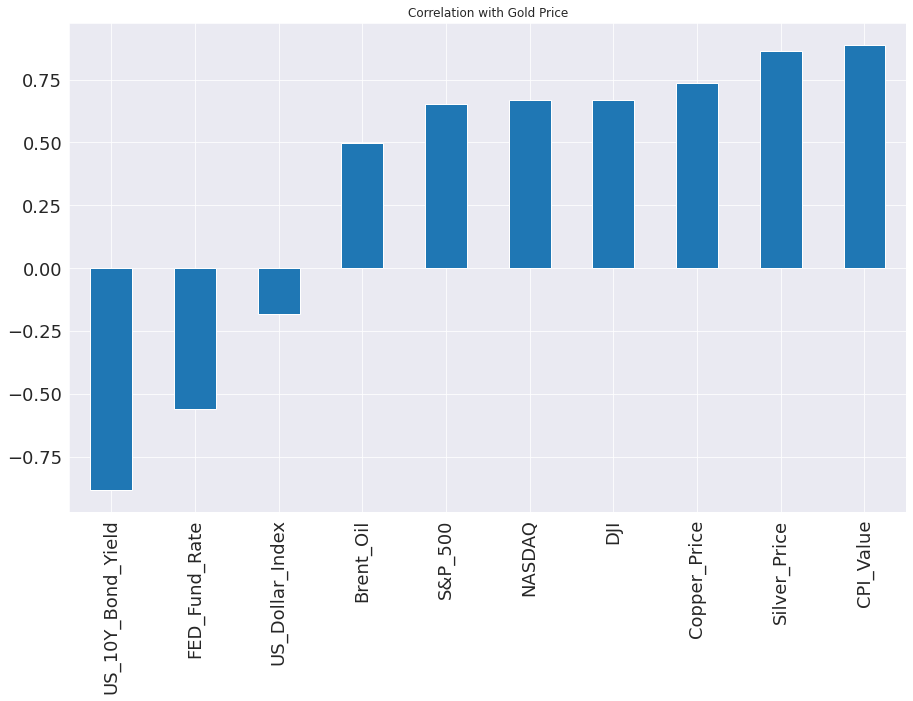

In [ ]:
sns.set_style('darkgrid')
sns.set_palette("tab10")
GoldMergedData[econ_features].corrwith(GoldMergedData['Gold_Price']).sort_values()[:-1].plot.bar(
        figsize = (15, 9), title = "Correlation with Gold Price", fontsize = 18,
         rot = 90,grid = True)

## Technical Indicators

### I. Bollinger Band

A Bollinger Band is a technical analysis tool that is described as a series of trendlines plotted two standard deviations (positively and negatively) away from a security's price's simple moving average (SMA) to generate oversold or overbought signals. Bollinger Bands are made up of three lines: a simple moving average (middle band), an upper and lower band, and an upper and lower band that are generally 2 standard deviations +/- from a 20-day simple moving average (which is the centre line).


In [ ]:
def calculate_SMA20(GoldMergedData, peroids=20):
    SMA20 = GoldMergedData.rolling(window=peroids, min_periods=peroids, center=False).mean()
    return SMA20
Gold_Price = GoldMergedData['Gold_Price']
date= GoldMergedData['Date']

def calculate_BB(GoldMergedData, peroids=20):
    STD = GoldMergedData.rolling(window=peroids,min_periods=peroids, center=False).std()
    SMA20 = calculate_SMA20(GoldMergedData)
    upper_band = SMA20 + (2 * STD)
    lower_band = SMA20 - (2 * STD)
    return upper_band, lower_band

# Calculate Simple Moving Average for GLD
SMA_GLD20 = calculate_SMA20(Gold_Price)

# Calculate Bollinger Bands for GLD
upper_band, lower_band = calculate_BB(Gold_Price)




In [ ]:
# Construct a 1 x 1 Plotly figure
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(rows=1, cols=1)
# price Line
fig.append_trace(
    go.Scatter(
        x=date.tail(250),
        y=SMA_GLD20.tail(250),
        line=dict(width=1),
        name='SMA20',
        # showlegend=False,
        legendgroup='1',
    ), row=1, col=1
)

fig.append_trace(
    go.Scatter(
        x=date.tail(250),
        y=upper_band.tail(250),
        line=dict( width=1),
        name='Upper band',
        # showlegend=False,
        legendgroup='1',
    ), row=1, col=1
)
fig.append_trace(
    go.Scatter(
        x=date.tail(250),
        y=lower_band.tail(250),
        line=dict(width=1),
        name='Lower Band',
        # showlegend=False,
        legendgroup='1',
    ), row=1, col=1
)
# Candlestick chart for pricing
fig.append_trace(
    go.Candlestick(
        x=date.tail(250),
        open=GoldMergedData.Gold_Open.tail(250),
        high=GoldMergedData.Gold_High.tail(250),
        low=GoldMergedData.Gold_Low.tail(250),
        close=GoldMergedData.Gold_Price.tail(250),
        increasing_line_color='black',
        decreasing_line_color='red',
        showlegend=False,
                
    ), row=1, col=1
)

# Make it pretty
layout = go.Layout(
    plot_bgcolor='#efefef',
    # Font Families
    font_family='Monospace',
    font_color='#000000',
    font_size=12,
    xaxis=dict(
        rangeslider=dict(
            visible=False
        )
    )
)
# Update options and show plot
fig.update_layout(layout)
fig.update_layout(
    title={
        'text': "Bollinger Band",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    font=dict(
        size=18
        )    
    )
fig.show()



### II. Moving Averages

[Moving Averages](https://www.investopedia.com/terms/m/movingaverage.asp) (MA) help to smooth out stock prices on a chart by filtering out short-term price fluctuations. We calculate moving averages over a defined period of time e.g. last 9, 50 or 200 days. There are two (most common) averages used in technical analysis which are:
* *Simple Moving Average (SMA)* - a simple average calculated over last N days e.g. 50, 100 or 200,
* *Exponential Moving Average (EMA)* - an average where greater weights are applied to recent prices.

MAs and their crossovers (see [Golden Cross](https://www.investopedia.com/terms/g/goldencross.asp) and [Death Cross](https://www.investopedia.com/terms/d/deathcross.asp) are often used as trade signals as they are so simple yet powerful.

In [ ]:
def calculate_SMA50(GoldMergedData, peroids=50):
    SMA50 = GoldMergedData.rolling(window=peroids, min_periods=peroids, center=False).mean()
    return SMA50
def calculate_SMA100(GoldMergedData, peroids=100):
    SMA100 = GoldMergedData.rolling(window=peroids, min_periods=peroids, center=False).mean()
    return SMA100
def calculate_SMA200(GoldMergedData, peroids=200):
    SMA200 = GoldMergedData.rolling(window=peroids, min_periods=peroids, center=False).mean()
    return SMA200

def calculate_EMA20(GoldMergedData, peroids=20):
    EMA20 = GoldMergedData.ewm(span=peroids, min_periods=peroids, adjust=True, ignore_na=False).mean()
    return EMA20


# Calculate Simple Moving Average for GLD
SMA_GLD50 = calculate_SMA50(Gold_Price)
SMA_GLD100 = calculate_SMA100(Gold_Price)
SMA_GLD200 = calculate_SMA200(Gold_Price)
EMA_GLD20 = calculate_EMA20(Gold_Price)
SMA_h = SMA_GLD50-SMA_GLD200


In [ ]:
# Construct a 2 x 1 Plotly figure
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(rows=2, cols=1)
# price Line
fig.append_trace(
    go.Scatter(
        x=date.tail(250),
        y=SMA_GLD50.tail(250),
        line=dict(width=1),
        name='SMA50',
        # showlegend=False,
        legendgroup='1',
    ), row=1, col=1
)

fig.append_trace(
    go.Scatter(
        x=date.tail(250),
        y=SMA_GLD200.tail(250),
        line=dict( width=1),
        name='SMA200',
        # showlegend=False,
        legendgroup='1',
    ), row=1, col=1
)
# fig.append_trace(
#     go.Scatter(
#         x=date.tail(250),
#         y=EMA_GLD20.tail(365),
#         line=dict(width=1),
#         name='EMA20',
#         # showlegend=False,
#         legendgroup='1',
#     ), row=1, col=1
# )
# Candlestick chart for pricing
fig.append_trace(
    go.Candlestick(
        x=date.tail(250),
        open=GoldMergedData.Gold_Open.tail(250),
        high=GoldMergedData.Gold_High.tail(250),
        low=GoldMergedData.Gold_Low.tail(250),
        close=GoldMergedData.Gold_Price.tail(250),
        increasing_line_color='black',
        decreasing_line_color='red',
        showlegend=False
    ), row=1, col=1
)

# Make it pretty
layout = go.Layout(
    plot_bgcolor='#efefef',
    # Font Families
    font_family='Monospace',
    font_color='#000000',
    font_size=12,
    xaxis=dict(
        rangeslider=dict(
            visible=False
        )
    )
)

# Colorize the histogram values
colors = np.where(SMA_h.tail(250) < 0, '#000', '#ff9900')
# Plot the histogram
fig.append_trace(
    go.Bar(
        x=date.tail(250),
        y=SMA_h.tail(250),
        name='Histogram',
        marker_color=colors,
    ), row=2, col=1
)
# Make it pretty
layout = go.Layout(
    plot_bgcolor='#efefef',
    # Font Families
    font_family='Monospace',
    font_color='#000000',
    font_size=12,
    xaxis=dict(
        rangeslider=dict(
            visible=False
        )
    )
)
# Update options and show plot
fig.update_layout(layout)
fig.update_layout(
    title={
        'text': "Simple Moving Average (SMA)",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    font=dict(
        size=18
        )    
    )

fig.show()


### III. MACD

[Moving Average Convergence Divergence](https://www.investopedia.com/terms/m/macd.asp) (MACD) is an indicator which shows the relationship between two exponential moving averages i.e. 12-day and 26-day EMAs. We obtain MACD by substracting 26-day EMA (also called *slow EMA*) from the 12-day EMA (or *fast EMA*).

You can more more about entry/exit signals that can be read from MACD under [this link](https://www.investopedia.com/terms/m/macd.asp).

MACD line in yellow, our Signal line in black, and several notable crossover points circled in green. The histogram, displayed a bar chart under the MACD and Signal lines, reflects yellow when the difference between the MACD and Signal is positive (uptrend) and black when the value is negative (downtrend.)
https://www.alpharithms.com/calculate-macd-python-272222/#:~:text=MACD%20%E2%80%93%20the%20value%20of%20an,signal%20line%20of%20the%20MACD.

In [ ]:
def calculate_MACD(GoldMergedData, nslow=26, nfast=12):
    emaslow = GoldMergedData.ewm(span=nslow, min_periods=nslow, adjust=True, ignore_na=False).mean()
    emafast = GoldMergedData.ewm(span=nfast, min_periods=nfast, adjust=True, ignore_na=False).mean()
    MACD = emafast - emaslow
    MACD_s = MACD.ewm(span=9, min_periods=9, adjust=True, ignore_na=False).mean()
    MACD_h = MACD -MACD_s
    return MACD, MACD_s,MACD_h

# Calculate MACD for GLD
MACD, MACD_s,MACD_h = calculate_MACD(Gold_Price)


In [ ]:
# Construct a 2 x 1 Plotly figure
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(rows=1, cols=1)

# Candlestick chart for pricing
# fig.append_trace(
#     go.Candlestick(
#         x=date.tail(250),
#         open=GoldMergedData.Gold_Open.tail(250),
#         high=GoldMergedData.Gold_High.tail(250),
#         low=GoldMergedData.Gold_Low.tail(250),
#         close=GoldMergedData.Gold_Price.tail(250),
#         increasing_line_color='black',
#         decreasing_line_color='red',
#         showlegend=False
#     ), row=1, col=1
# )
# Fast Signal (%k)
fig.append_trace(
    go.Scatter(
        x=date.tail(250),
        y=MACD.tail(250),
        line=dict(color='#ff9900', width=1),
        name='MACD line',
        # showlegend=False,
        legendgroup='2',
    ), row=1, col=1
)
# Slow signal (%d)
fig.append_trace(
    go.Scatter(
        x=date.tail(250),
        y=MACD_s.tail(250),
        line=dict(color='#000000', width=1),
        # showlegend=False,
        legendgroup='2',
        name='Signal line'
    ), row=1, col=1
)
# Colorize the histogram values
colors = np.where(MACD_h.tail(250) < 0, '#000', '#ff9900')
# Plot the histogram
fig.append_trace(
    go.Bar(
        x=date.tail(250),
        y=MACD_h.tail(250),
        name='MACD Histogram',
        marker_color=colors,
    ), row=1, col=1
)
# Make it pretty
layout = go.Layout(
    plot_bgcolor='#efefef',
    # Font Families
    font_family='Monospace',
    font_color='#000000',
    font_size=12,
    xaxis=dict(
        rangeslider=dict(
            visible=False
        )
    )
)
# Update options and show plot
fig.update_layout(layout)
fig.update_layout(
    title={
        'text': "Moving Average Convergence Divergence (MACD)",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    font=dict(
        size=18
        )    
    )
fig.show()

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(
        x=date,
        y=GoldMergedData.Gold_Price,
        line=dict(color='black', width=1),
        name='RSI',
        # showlegend=False,
        legendgroup='2',
    ))

# Make it pretty
layout = go.Layout(
    plot_bgcolor='#efefef',
    # Font Families
    font_family='Monospace',
    font_color='#000000',
    font_size=12,
    xaxis=dict(
        rangeslider=dict(
            visible=False
        )
    )
)
# Update options and show plot
fig.update_layout(layout)
fig.update_layout(
    title={
        'text': "Gold Prices",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    font=dict(
        size=16
        )    
    )

fig.show()

### IV. RSI

Another commonly used indicator is a [Relative Strength Index](https://www.investopedia.com/terms/r/rsi.asp) (RSI) that indicates magnitude of recent price changes. It can show that a stock is either *overbought* or *oversold*. Typically RSI value of 70 and above signal that a stock is becoming overbought/overvalued, meanwhile value of 30 and less can mean that it is oversold. Full range of RSI is from 0 to 100.


In [ ]:
def calculate_RSI(GoldMergedData, periods=14):
    # wilder's RSI
    delta = GoldMergedData.diff()
    up, down = delta.copy(), delta.copy()

    up[up < 0] = 0
    down[down > 0] = 0

    rUp = up.ewm(com=periods,adjust=False).mean()
    rDown = down.ewm(com=periods, adjust=False).mean().abs()

    rsi = 100 - 100 / (1 + rUp / rDown)
    return rsi


# Calculate RSI for GLD
RSI = calculate_RSI(Gold_Price)

fig = go.Figure()
fig.add_trace(go.Scatter(
        x=date.tail(250),
        y=RSI.tail(250),
        line=dict(color='black', width=1),
        name='RSI',
        # showlegend=False,
        legendgroup='2',
    ))

# Make it pretty
layout = go.Layout(
    plot_bgcolor='#efefef',
    # Font Families
    font_family='Monospace',
    font_color='#000000',
    font_size=12,
    xaxis=dict(
        rangeslider=dict(
            visible=False
        )
    )
)
# Update options and show plot
fig.update_layout(layout)
fig.update_layout(
    title={
        'text': " Relative Strength Index (RSI)",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    font=dict(
        size=18
        )    
    )
fig.show()



In [ ]:
# # Construct a 2 x 1 Plotly figure
# from plotly.subplots import make_subplots
# import plotly.graph_objects as go

# fig = make_subplots(rows=2, cols=1)

# Candlestick chart for pricing
# fig.append_trace(
#     go.Candlestick(
#         x=date.tail(250),
#         open=GoldMergedData.Gold_Open.tail(250),
#         high=GoldMergedData.Gold_High.tail(250),
#         low=GoldMergedData.Gold_Low.tail(250),
#         close=GoldMergedData.Gold_Price.tail(250),
#         increasing_line_color='black',
#         decreasing_line_color='red',
#         showlegend=False
#     ), row=1, col=1
# )
# # RSI
# fig.append_trace(
#     go.Scatter(
#         x=date.tail(250),
#         y=RSI.tail(250),
#         line=dict(color='black', width=1),
#         name='RSI',
#         # showlegend=False,
#         legendgroup='2',
#     ), row=2, col=1,
# )


# # Make it pretty
# layout = go.Layout(
#     plot_bgcolor='#efefef',
#     # Font Families
#     font_family='Monospace',
#     font_color='#000000',
#     font_size=12,
#     xaxis=dict(
#         rangeslider=dict(
#             visible=False
#         )
#     )
# )
# # Update options and show plot
# fig.update_layout(layout)
# fig.show()

### VI. Standard Deviation

In [ ]:
def calculate_stdev(GoldMergedData,periods=5):
    STDEV = GoldMergedData.rolling(periods).std()
    return STDEV

# Calculating Standard deviation for GLD
STDEV= calculate_stdev(Gold_Price)


fig = go.Figure()
fig.add_trace(go.Scatter(
        x=date.tail(250),
        y=STDEV.tail(250),
        line=dict(color='black', width=1),
        name='STDEV',
        # showlegend=False,
        legendgroup='2',
    ))

# Make it pretty
layout = go.Layout(
    plot_bgcolor='#efefef',
    # Font Families
    font_family='Monospace',
    font_color='#000000',
    font_size=12,
    xaxis=dict(
        rangeslider=dict(
            visible=False
        )
    )
)
# Update options and show plot
fig.update_layout(layout)
fig.update_layout(
    title={
        'text': "Standard Deviation",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    font=dict(
        size=18
        )    
    )
fig.show()

In [ ]:
# # Construct a 2 x 1 Plotly figure
# from plotly.subplots import make_subplots
# import plotly.graph_objects as go

# fig = make_subplots(rows=2, cols=1)

# # Candlestick chart for pricing
# fig.append_trace(
#     go.Candlestick(
#         x=date.tail(250),
#         open=GoldMergedData.Gold_Open.tail(250),
#         high=GoldMergedData.Gold_High.tail(250),
#         low=GoldMergedData.Gold_Low.tail(250),
#         close=GoldMergedData.Gold_Price.tail(250),
#         increasing_line_color='black',
#         decreasing_line_color='red',
#         showlegend=False
#     ), row=1, col=1
# )
# # RSI
# fig.append_trace(
#     go.Scatter(
#         x=date.tail(250),
#         y=STDEV.tail(250),
#         line=dict(color='black', width=1),
#         name='STDEV',
#         # showlegend=False,
#         legendgroup='2',
#     ), row=2, col=1
# )


# # Make it pretty
# layout = go.Layout(
#     plot_bgcolor='#efefef',
#     # Font Families
#     font_family='Monospace',
#     font_color='#000000',
#     font_size=12,
#     xaxis=dict(
#         rangeslider=dict(
#             visible=False
#         )
#     )
# )
# # Update options and show plot
# fig.update_layout(layout)
# fig.show()

### VII. ROC

In [ ]:
# Rate of Change (ROC)
def calculate_ROC(GoldMergedData,n=14):
 N = GoldMergedData.diff(n)
 D = GoldMergedData.shift(n)
 ROC = pd.Series(N/D,name='Rate of Change')
 return ROC 

# Calculating Standard deviation for GLD
ROC= calculate_ROC(Gold_Price)


fig = go.Figure()
fig.add_trace(go.Scatter(
        x=date.tail(250),
        y=ROC.tail(250),
        line=dict(color='black', width=1),
        name='ROC',
        showlegend=False,
        legendgroup='2',
    ))

fig.update_layout(
    title={
        'text': "Rate of Change (ROC)",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    font=dict(
        size=18
        )    
    )
fig.show()

In [ ]:
# # Construct a 2 x 1 Plotly figure
# from plotly.subplots import make_subplots
# import plotly.graph_objects as go

# fig = make_subplots(rows=2, cols=1)

# # Candlestick chart for pricing
# fig.append_trace(
#     go.Candlestick(
#         x=date.tail(250),
#         open=GoldMergedData.Gold_Open.tail(250),
#         high=GoldMergedData.Gold_High.tail(250),
#         low=GoldMergedData.Gold_Low.tail(250),
#         close=GoldMergedData.Gold_Price.tail(250),
#         increasing_line_color='black',
#         decreasing_line_color='red',
#         showlegend=False
#     ), row=1, col=1
# )
# # ROC
# fig.append_trace(
#     go.Scatter(
#         x=date.tail(250),
#         y=ROC.tail(250),
#         line=dict(color='black', width=1),
#         name='ROC',
#         # showlegend=False,
#         legendgroup='2',
#     ), row=2, col=1
# )


# # Make it pretty
# layout = go.Layout(
#     plot_bgcolor='#efefef',
#     # Font Families
#     font_family='Monospace',
#     font_color='#000000',
#     font_size=12,
#     xaxis=dict(
#         rangeslider=dict(
#             visible=False
#         )
#     )
# )
# # Update options and show plot
# fig.update_layout(layout)
# fig.show()



In [ ]:
test = GoldMergedData
test['SMA_GLD20'] = SMA_GLD20
test['Upper_band'] = upper_band
test['Lower_band'] = lower_band
test['SMA_GLD50'] = SMA_GLD50
test['SMA_GLD200'] = SMA_GLD200
test['SMA_H'] = SMA_h
test['MACD'] = MACD
test['MACD_S'] = MACD_s
test['MACD_H'] = MACD_h
test['RSI'] = RSI
test['STDEV'] = STDEV
test['ROC'] = ROC


<ipython-input-32-18bf1b493c10>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-32-18bf1b493c10>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-32-18bf1b493c10>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-32-18bf1b4

In [ ]:
test

,Date,Gold_Price,Gold_Open,Gold_High,Gold_Low,Silver_Price,Copper_Price,Brent_Oil,S&P_500,NASDAQ,...,Lower_band,SMA_GLD50,SMA_GLD200,SMA_H,MACD,MACD_S,MACD_H,RSI,STDEV,ROC
0,2002-01-02,278.85,278.85,278.85,278.85,4.535,0.6580,21.00,1154.70,1979.25,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2002-01-03,278.45,278.85,278.45,278.45,4.608,0.6640,20.66,1165.30,2044.27,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
2,2002-01-04,278.95,278.55,278.95,278.95,4.650,0.6745,22.18,1172.50,2059.38,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.196721,NaN,NaN
3,2002-01-07,278.75,278.90,278.75,278.75,4.667,0.7150,22.03,1164.90,2037.10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.918552,NaN,NaN
4,2002-01-08,279.05,278.85,279.05,279.05,4.640,0.7085,22.02,1160.70,2055.74,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.681021,0.230217,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5205,2021-12-28,1805.37,1811.84,1820.70,1804.38,23.121,4.4295,78.94,4786.36,15781.72,...,1761.795361,1800.4398,1792.97150,7.46830,0.975565,-2.509693,3.485259,53.619925,8.752826,0.011956
5206,2021-12-29,1803.66,1805.59,1808.16,1788.94,22.858,4.4100,79.23,4793.06,15766.22,...,1763.125793,1801.1678,1793.35955,7.80825,1.405763,-1.726602,3.132365,52.888398,3.161609,0.012121
5207,2021-12-30,1815.01,1803.99,1817.44,1795.78,23.060,4.3925,79.32,4778.73,15741.56,...,1762.403063,1802.1760,1793.82755,8.34845,2.632205,-0.854841,3.487046,57.054981,4.519021,0.022852
5208,2021-12-31,1828.39,1815.44,1830.58,1814.15,23.352,4.4635,77.78,4766.18,15644.97,...,1762.568351,1803.3664,1794.33745,9.02895,4.630447,0.242217,4.388230,61.370158,9.876701,0.025739


In [ ]:
test.to_excel('GLDIND.xlsx')

In [ ]:
# Check Null values in the dataset
test.isnull().sum()

Date                   0
Gold_Price             0
Gold_Open              0
Gold_High              0
Gold_Low               0
Silver_Price           0
Copper_Price           0
Brent_Oil              0
S&P_500                0
NASDAQ                 0
DJI                    0
US_10Y_Bond_Yield      0
CPI_Value              0
FED_Fund_Rate          0
US_Dollar_Index        0
SMA_GLD20             19
Upper_band            19
Lower_band            19
SMA_GLD50             49
SMA_GLD200           199
SMA_H                199
MACD                  25
MACD_S                33
MACD_H                33
RSI                    1
STDEV                  4
ROC                   14
dtype: int64

In [ ]:
# Dropping first 200 records from the data as it has null values because of introduction of technical indicators
df= test[200:]
display(df.head())

,Date,Gold_Price,Gold_Open,Gold_High,Gold_Low,Silver_Price,Copper_Price,Brent_Oil,S&P_500,NASDAQ,...,Lower_band,SMA_GLD50,SMA_GLD200,SMA_H,MACD,MACD_S,MACD_H,RSI,STDEV,ROC
212,2002-10-25,313.85,311.80,313.85,313.85,4.407,0.7145,25.46,897.6,1331.13,...,308.082349,316.538,307.16265,9.37535,-1.769097,-1.178497,-0.590600,45.922533,1.126721,-0.026520
213,2002-10-28,315.60,313.45,315.60,315.60,4.412,0.7135,25.68,890.2,1315.83,...,308.289792,316.556,307.34840,9.20760,-1.519282,-1.246654,-0.272629,49.260199,1.616091,-0.008327
214,2002-10-29,316.75,315.65,316.75,316.75,4.510,0.7040,25.31,882.1,1300.54,...,308.314122,316.611,307.53740,9.07360,-1.214507,-1.240224,0.025717,51.373319,2.251222,-0.010311
215,2002-10-30,316.40,317.00,316.40,316.40,4.494,0.7060,25.30,890.7,1326.73,...,308.641029,316.804,307.72565,9.07835,-0.989803,-1.190140,0.200337,50.685003,2.110391,-0.001420
216,2002-10-31,317.80,316.25,317.80,317.80,4.514,0.7195,25.72,885.8,1329.75,...,308.894441,316.979,307.91940,9.05960,-0.690792,-1.090271,0.399478,53.362967,1.475890,0.003315


In [ ]:
# Shift target because we want to predict the n + 1 day value
df['Shifted_Gold_Price'] = df['Gold_Price'].shift(-7)
df.insert(2, 'Shifted_Gold_Price', df.pop('Shifted_Gold_Price'))

<ipython-input-37-3894aff85b6a>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
# Dropping last column from the data as it has null values because of shifting
df1 = df[:-7]
print(df1.head())
print(df1.tail())

          Date  Gold_Price  Shifted_Gold_Price  Gold_Open  Gold_High  \
212 2002-10-25      313.85              317.75     311.80     313.85   
213 2002-10-28      315.60              318.25     313.45     315.60   
214 2002-10-29      316.75              321.10     315.65     316.75   
215 2002-10-30      316.40              321.55     317.00     316.40   
216 2002-10-31      317.80              321.65     316.25     317.80   

     Gold_Low  Silver_Price  Copper_Price  Brent_Oil  S&P_500  ...  \
212    313.85         4.407        0.7145      25.46    897.6  ...   
213    315.60         4.412        0.7135      25.68    890.2  ...   
214    316.75         4.510        0.7040      25.31    882.1  ...   
215    316.40         4.494        0.7060      25.30    890.7  ...   
216    317.80         4.514        0.7195      25.72    885.8  ...   

     Lower_band  SMA_GLD50  SMA_GLD200    SMA_H      MACD    MACD_S    MACD_H  \
212  308.082349    316.538   307.16265  9.37535 -1.769097 -1.1784

In [ ]:
df1.columns

Index(['Date', 'Gold_Price', 'Shifted_Gold_Price', 'Gold_Open', 'Gold_High',
       'Gold_Low', 'Silver_Price', 'Copper_Price', 'Brent_Oil', 'S&P_500',
       'NASDAQ', 'DJI', 'US_10Y_Bond_Yield', 'CPI_Value', 'FED_Fund_Rate',
       'US_Dollar_Index', 'SMA_GLD20', 'Upper_band', 'Lower_band', 'SMA_GLD50',
       'SMA_GLD200', 'SMA_H', 'MACD', 'MACD_S', 'MACD_H', 'RSI', 'STDEV',
       'ROC'],
      dtype='object')

In [ ]:
df1.shape

(4788, 28)

In [ ]:
df1

,Date,Gold_Price,Shifted_Gold_Price,Gold_Open,Gold_High,Gold_Low,Silver_Price,Copper_Price,Brent_Oil,S&P_500,...,Lower_band,SMA_GLD50,SMA_GLD200,SMA_H,MACD,MACD_S,MACD_H,RSI,STDEV,ROC
212,2002-10-25,313.85,317.75,311.80,313.85,313.85,4.407,0.7145,25.46,897.60,...,308.082349,316.5380,307.16265,9.37535,-1.769097,-1.178497,-0.590600,45.922533,1.126721,-0.026520
213,2002-10-28,315.60,318.25,313.45,315.60,315.60,4.412,0.7135,25.68,890.20,...,308.289792,316.5560,307.34840,9.20760,-1.519282,-1.246654,-0.272629,49.260199,1.616091,-0.008327
214,2002-10-29,316.75,321.10,315.65,316.75,316.75,4.510,0.7040,25.31,882.10,...,308.314122,316.6110,307.53740,9.07360,-1.214507,-1.240224,0.025717,51.373319,2.251222,-0.010311
215,2002-10-30,316.40,321.55,317.00,316.40,316.40,4.494,0.7060,25.30,890.70,...,308.641029,316.8040,307.72565,9.07835,-0.989803,-1.190140,0.200337,50.685003,2.110391,-0.001420
216,2002-10-31,317.80,321.65,316.25,317.80,317.80,4.514,0.7195,25.72,885.80,...,308.894441,316.9790,307.91940,9.05960,-0.690792,-1.090271,0.399478,53.362967,1.475890,0.003315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5197,2021-12-16,1799.03,1805.37,1777.40,1799.53,1775.43,22.485,4.3025,75.02,4668.67,...,1736.927282,1795.9098,1789.79445,6.11535,-6.712863,-6.358645,-0.354217,51.849003,10.865737,0.005888
5198,2021-12-17,1797.68,1803.66,1799.55,1814.63,1795.67,22.533,4.2925,73.52,4620.64,...,1744.788108,1796.6138,1790.16365,6.45015,-5.293517,-6.145620,0.852102,51.392401,12.620662,0.007098
5199,2021-12-20,1789.32,1815.01,1799.40,1804.32,1787.98,22.291,4.2900,71.52,4568.02,...,1754.280890,1797.2944,1790.41980,6.87460,-4.788064,-5.874109,1.086045,48.555333,12.701212,0.008761
5200,2021-12-21,1788.36,1828.39,1789.74,1800.85,1784.58,22.529,4.3425,73.98,4649.23,...,1765.555474,1797.9282,1790.80685,7.12135,-4.414070,-5.582101,1.168031,48.227769,8.813319,0.003197


## Selecting Attributes 

In [ ]:
# Target column
df_target= pd.DataFrame(df1['Shifted_Gold_Price'])
# selecting Feature Columns

feature_columns_econ = ['Silver_Price', 'Copper_Price', 'Brent_Oil', 'S&P_500',
       'NASDAQ', 'DJI', 'US_10Y_Bond_Yield', 'CPI_Value', 'FED_Fund_Rate',
       'US_Dollar_Index']

feature_columns_ind = ['SMA_GLD20', 'Upper_band', 'Lower_band', 'SMA_GLD50',
       'SMA_GLD200', 'SMA_H', 'MACD', 'MACD_S', 'MACD_H', 'RSI','ROC']

feature_columns_all = ['Silver_Price', 'Copper_Price', 'Brent_Oil', 'S&P_500',
       'NASDAQ', 'DJI', 'US_10Y_Bond_Yield', 'CPI_Value', 'FED_Fund_Rate',
       'US_Dollar_Index', 'SMA_GLD20', 'Upper_band', 'Lower_band', 'SMA_GLD50',
       'SMA_GLD200', 'SMA_H', 'MACD', 'MACD_S', 'MACD_H', 'RSI','ROC']

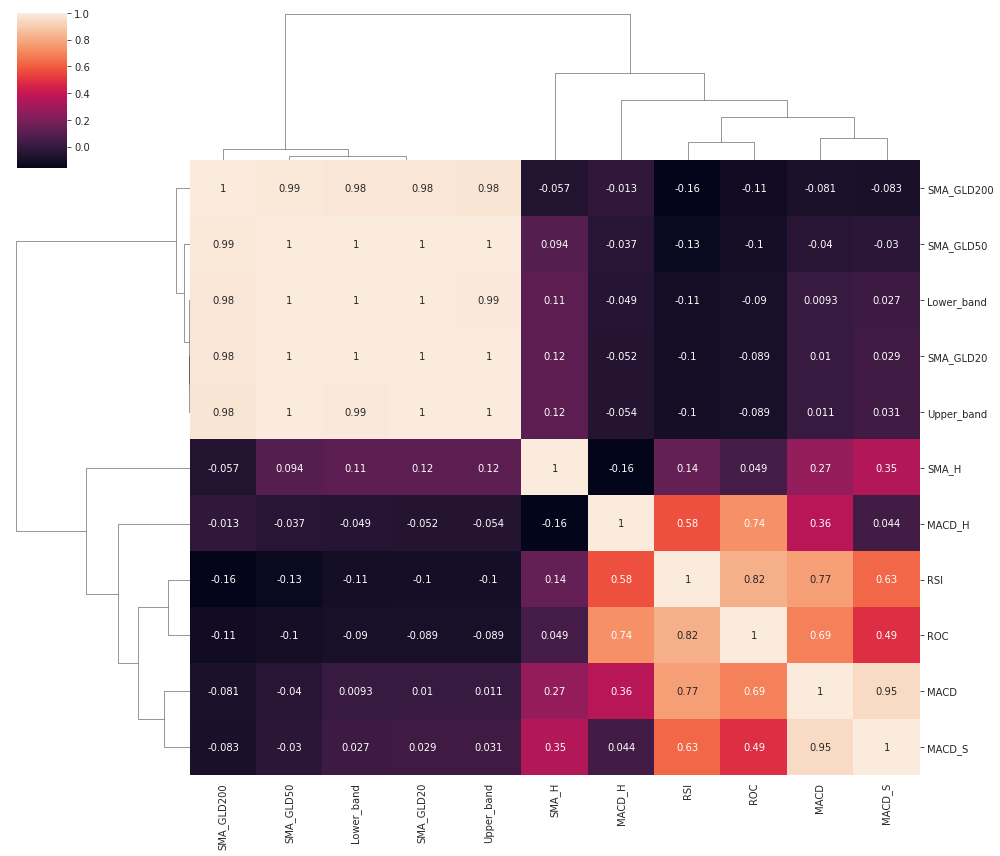

In [ ]:
sns.clustermap(df1[feature_columns_ind].corr(),annot=True, figsize=(14, 12))

## Normalizing the data
In this step I would perform feature scaling/normalization of feature variables using sklearn's MinMaxScaler function.

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# Feature columns
# Economic Variables
econ_feature_data = scaler.fit_transform(df1[feature_columns_econ])
econ_feature = pd.DataFrame(columns=feature_columns_econ, data=econ_feature_data, index=df1.index)
econ_feature

# Technical Indicator
ind_feature_data = scaler.fit_transform(df1[feature_columns_ind])
ind_feature = pd.DataFrame(columns=feature_columns_ind, data=ind_feature_data, index=df1.index)
ind_feature

# All Variables
all_feature_data = scaler.fit_transform(df1[feature_columns_all])
all_feature = pd.DataFrame(columns=feature_columns_all, data=all_feature_data, index=df1.index)
all_feature

#Target Column
df_target=scaler.fit_transform(np.array(df_target).reshape(-1,1))

In [ ]:
ind_feature

,SMA_GLD20,Upper_band,Lower_band,SMA_GLD50,SMA_GLD200,SMA_H,MACD,MACD_S,MACD_H,RSI,ROC
212,0.000922,0.002679,0.000000,0.000000,0.000000,0.519021,0.430905,0.419827,0.620991,0.409752,0.441478
213,0.000676,0.002106,0.000129,0.000011,0.000120,0.518650,0.432908,0.419170,0.628072,0.455868,0.494123
214,0.000569,0.001894,0.000144,0.000045,0.000242,0.518354,0.435352,0.419232,0.634716,0.485064,0.488381
215,0.000371,0.001341,0.000346,0.000163,0.000364,0.518365,0.437154,0.419715,0.638605,0.475554,0.514108
216,0.000255,0.000983,0.000503,0.000271,0.000489,0.518323,0.439551,0.420678,0.643040,0.512555,0.527810
...,...,...,...,...,...,...,...,...,...,...,...
5197,0.890967,0.857370,0.885845,0.908460,0.958269,0.511817,0.391266,0.369891,0.626255,0.491637,0.535254
5198,0.888880,0.849085,0.890718,0.908893,0.958507,0.512557,0.402646,0.371944,0.653120,0.485328,0.538757
5199,0.886797,0.839893,0.896604,0.909311,0.958673,0.513495,0.406699,0.374562,0.658330,0.446129,0.543569
5200,0.885103,0.830426,0.903594,0.909700,0.958923,0.514040,0.409698,0.377377,0.660156,0.441603,0.527470


## Train Test Split
In this step we would perform Train test split.

In [ ]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.80)
test_size=len(df1)-training_size

# Feature columns
# Economic Variables
X_train_E,X_test_E=econ_feature_data[0:training_size,:],econ_feature_data[training_size:len(econ_feature_data),:]

# Technical Indicator
X_train_T,X_test_T=ind_feature_data[0:training_size,:],ind_feature_data[training_size:len(ind_feature_data),:]

# All Variables
X_train_A,X_test_A=all_feature_data[0:training_size,:],all_feature_data[training_size:len(all_feature_data),:]


#Target Column
y_train,y_test=df_target[0:training_size,:],df_target[training_size:len(df_target),:1]

In [ ]:
dates= pd.DataFrame(df1['Date'])
y_train_dates,y_test_dates=dates[0:training_size],dates[training_size:len(df_target)]

In [ ]:
y_train_dates

,Date
212,2002-10-25
213,2002-10-28
214,2002-10-29
215,2002-10-30
216,2002-10-31
...,...
4198,2018-02-13
4199,2018-02-14
4200,2018-02-15
4201,2018-02-16


In [ ]:
y_test_dates

,Date
4204,2018-02-21
4205,2018-02-22
4206,2018-02-23
4207,2018-02-26
4208,2018-02-27
...,...
5197,2021-12-16
5198,2021-12-17
5199,2021-12-20
5200,2021-12-21


## Model Building

## M5P

In [ ]:
!pip install m5py

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from m5py import M5Prime
m5p_E1 = M5Prime(max_depth=2,min_samples_leaf=3,use_smoothing=False)
m5p_E1.fit(X_train_E,y_train) 

M5Prime(leaf_model=DeNormalizableLinearRegression(), max_depth=2,
        min_samples_leaf=3, use_smoothing=False)

In [ ]:
m5p_E2 = M5Prime(max_depth=3,min_samples_leaf=3,use_smoothing=False)
m5p_E2.fit(X_train_E,y_train) 

M5Prime(leaf_model=DeNormalizableLinearRegression(), max_depth=3,
        min_samples_leaf=3, use_smoothing=False)

In [ ]:
m5p_E3 = M5Prime(max_depth=4,min_samples_leaf=3,use_smoothing=False)
m5p_E3.fit(X_train_E,y_train) 

M5Prime(leaf_model=DeNormalizableLinearRegression(), max_depth=4,
        min_samples_leaf=3, use_smoothing=False)

In [ ]:
m5p_E4 = M5Prime(max_depth=5,min_samples_leaf=3,use_smoothing=False)
m5p_E4.fit(X_train_E,y_train) 

M5Prime(leaf_model=DeNormalizableLinearRegression(), max_depth=5,
        min_samples_leaf=3, use_smoothing=False)

In [ ]:
m5p_E5 = M5Prime(max_depth=6,min_samples_leaf=3,use_smoothing=False)
m5p_E5.fit(X_train_E,y_train) 

M5Prime(leaf_model=DeNormalizableLinearRegression(), max_depth=6,
        min_samples_leaf=3, use_smoothing=False)

#### TECHNICAL ANALYSIS

In [ ]:
from m5py import M5Prime
m5p_T1 = M5Prime(max_depth=2,min_samples_leaf=3,use_smoothing=False)
m5p_T1.fit(X_train_T,y_train) 

M5Prime(leaf_model=DeNormalizableLinearRegression(), max_depth=2,
        min_samples_leaf=3, use_smoothing=False)

In [ ]:
m5p_T2 = M5Prime(max_depth=3,min_samples_leaf=3,use_smoothing=False)
m5p_T2.fit(X_train_T,y_train) 

M5Prime(leaf_model=DeNormalizableLinearRegression(), max_depth=3,
        min_samples_leaf=3, use_smoothing=False)

In [ ]:
m5p_T3 = M5Prime(max_depth=4,min_samples_leaf=3,use_smoothing=False)
m5p_T3.fit(X_train_T,y_train) 

M5Prime(leaf_model=DeNormalizableLinearRegression(), max_depth=4,
        min_samples_leaf=3, use_smoothing=False)

In [ ]:
m5p_T4 = M5Prime(max_depth=5,min_samples_leaf=3,use_smoothing=False)
m5p_T4.fit(X_train_T,y_train) 

M5Prime(leaf_model=DeNormalizableLinearRegression(), max_depth=5,
        min_samples_leaf=3, use_smoothing=False)

In [ ]:
m5p_T5 = M5Prime(max_depth=6,min_samples_leaf=3,use_smoothing=False)
m5p_T5.fit(X_train_T,y_train) 

M5Prime(leaf_model=DeNormalizableLinearRegression(), max_depth=6,
        min_samples_leaf=3, use_smoothing=False)

### ALL 

In [ ]:
from m5py import M5Prime
m5p_A1 = M5Prime(max_depth=2,min_samples_leaf=3,use_smoothing=False)
m5p_A1.fit(X_train_A,y_train) 

M5Prime(leaf_model=DeNormalizableLinearRegression(), max_depth=2,
        min_samples_leaf=3, use_smoothing=False)

In [ ]:
m5p_A2 = M5Prime(max_depth=3,min_samples_leaf=3,use_smoothing=False)
m5p_A2.fit(X_train_A,y_train) 

M5Prime(leaf_model=DeNormalizableLinearRegression(), max_depth=3,
        min_samples_leaf=3, use_smoothing=False)

In [ ]:
m5p_A3 = M5Prime(max_depth=4,min_samples_leaf=3,use_smoothing=False)
m5p_A3.fit(X_train_A,y_train) 

M5Prime(leaf_model=DeNormalizableLinearRegression(), max_depth=4,
        min_samples_leaf=3, use_smoothing=False)

In [ ]:
m5p_A4 = M5Prime(max_depth=5,min_samples_leaf=3,use_smoothing=False)
m5p_A4.fit(X_train_A,y_train) 

M5Prime(leaf_model=DeNormalizableLinearRegression(), max_depth=5,
        min_samples_leaf=3, use_smoothing=False)

In [ ]:
m5p_A5 = M5Prime(max_depth=6,min_samples_leaf=3,use_smoothing=False)
m5p_A5.fit(X_train_A,y_train) 

M5Prime(leaf_model=DeNormalizableLinearRegression(), max_depth=6,
        min_samples_leaf=3, use_smoothing=False)

## EVALUATE

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from sklearn import metrics


def validate_train_result(model, model_name,X_TRAIN):
    train_predict = model.predict(X_TRAIN)

    # Print out the MAE, MSE & RMSE
    print("MAE: ", metrics.mean_absolute_error(y_train, train_predict)) #MAE
    print("MSE: ", metrics.mean_squared_error(y_train, train_predict)) #MSE
    print("RMSE: ", np.sqrt(metrics.mean_squared_error(y_train, train_predict))) #RMSE 
    print("R2: ", r2_score(y_train, train_predict)) #R2 

    
    ##Transformback to original form
    train_predict2=scaler.inverse_transform(train_predict.reshape(-1,1))
    y_train2=scaler.inverse_transform(y_train)

    dates= pd.DataFrame(df1['Date'])
    y_train_dates,y_test_dates=dates[0:training_size],dates[training_size:len(df_target)]

    #plot the graph
    f = plt.figure()
    f.set_figwidth(16)
    f.set_figheight(8)
    matplotlib.rc('xtick', labelsize=14)
    matplotlib.rc('ytick', labelsize=14) 
    plt.plot(y_train_dates, train_predict2,'red', label='Predict')
    plt.plot(y_train_dates, y_train2,'black', label='Actual')
    plt.ylabel('Price', fontsize=16)
    plt.xlabel('Date', fontsize=16)
    plt.title(model_name + ' Predict vs Actual', fontsize=20)
    plt.legend(loc='upper right',prop={"size":16})
    plt.show()

In [ ]:
def validate_test_result(model, model_name,X_TEST):
    test_predict = model.predict(X_TEST)

    # Print out the MAE, MSE & RMSE
    print("MAE: ", metrics.mean_absolute_error(y_test, test_predict)) #MAE
    print("MSE: ", metrics.mean_squared_error(y_test, test_predict)) #MSE
    print("RMSE: ", np.sqrt(metrics.mean_squared_error(y_test, test_predict))) #RMSE 
    print("R2: ", r2_score(y_test, test_predict)) #R2 

    
    ##Transformback to original form
    test_predict2=scaler.inverse_transform(test_predict.reshape(-1,1))
    y_test2=scaler.inverse_transform(y_test)

    dates= pd.DataFrame(df1['Date'])
    y_train_dates,y_test_dates=dates[0:training_size],dates[training_size:len(df_target)]

    #plot the graph
    f = plt.figure()
    f.set_figwidth(16)
    f.set_figheight(8)
    matplotlib.rc('xtick', labelsize=14)
    matplotlib.rc('ytick', labelsize=14) 
    plt.plot(y_test_dates, test_predict2,'red', label='Predict')
    plt.plot(y_test_dates, y_test2,'black', label='Actual')
    plt.ylabel('Price', fontsize=16)
    plt.xlabel('Date', fontsize=16)
    plt.title(model_name + ' Predict vs Actual', fontsize=20)
    plt.legend(loc='upper right',prop={"size":16})
    plt.show()


    

In [ ]:
def test_result(model, model_name,X_TEST):
    test_predict = model.predict(X_TEST)
    test_predict =test_predict.reshape(-1,1)

    # Print out the MAE, MSE & RMSE
    print("MAE: ", metrics.mean_absolute_error(y_test, test_predict)) #MAE
    print("MSE: ", metrics.mean_squared_error(y_test, test_predict)) #MSE
    print("RMSE: ", np.sqrt(metrics.mean_squared_error(y_test, test_predict))) #RMSE 
    print("R2: ", r2_score(y_test, test_predict)) #R2 

### LSTM

#### ECONOMIC VARIABLES

In [ ]:
test_result(LSTM_E1, "LSTM Economic Variables",X_test_EL)

30/30 [==============================] - 1s 7ms/step
MAE:  0.09112722026787388
MSE:  0.01332999024386854
RMSE:  0.11545557692839502
R2:  0.3473924829900229


In [ ]:
test_result(LSTM_E2, "LSTM Economic Variables",X_test_EL)

30/30 [==============================] - 1s 6ms/step
MAE:  0.08384259169961263
MSE:  0.011202234431381112
RMSE:  0.1058406086121065
R2:  0.4515628096134564


In [ ]:
test_result(LSTM_E3, "LSTM Economic Variables",X_test_EL)

30/30 [==============================] - 2s 26ms/step
MAE:  0.08503252604885406
MSE:  0.010831019850131794
RMSE:  0.10407218576609119
R2:  0.46973667333840907


In [ ]:
test_result(LSTM_E4, "LSTM Economic Variables",X_test_EL)

30/30 [==============================] - 3s 33ms/step
MAE:  0.07574905962426447
MSE:  0.009323819495881227
RMSE:  0.09655992696704585
R2:  0.5435259457106418


In [ ]:
test_result(LSTM_E5, "LSTM Economic Variables",X_test_EL)

30/30 [==============================] - 4s 13ms/step
MAE:  0.15141932729877097
MSE:  0.03654011173522864
RMSE:  0.1911546801290218
R2:  -0.7889249095109736


In [ ]:
test_result(LSTM_E6, "LSTM Economic Variables",X_test_EL)

30/30 [==============================] - 2s 8ms/step
MAE:  0.1713099002639158
MSE:  0.047858223345978314
RMSE:  0.218765224261029
R2:  -1.34303519619559


In [ ]:
test_result(LSTM_E7, "LSTM Economic Variables",X_test_EL)

30/30 [==============================] - 2s 13ms/step
MAE:  0.14795175915374126
MSE:  0.0339959746623615
RMSE:  0.18437997359355895
R2:  -0.6643694561549169


In [ ]:
test_result(LSTM_E8, "LSTM Economic Variables",X_test_EL)

30/30 [==============================] - 2s 19ms/step
MAE:  0.10867200561442215
MSE:  0.018584902220098863
RMSE:  0.13632645458640397
R2:  0.09012334819143619


120/120 [==============================] - 1s 4ms/step
MAE:  0.023587618744805697
MSE:  0.0008961209803261802
RMSE:  0.02993527986049538
R2:  0.9845175898134373


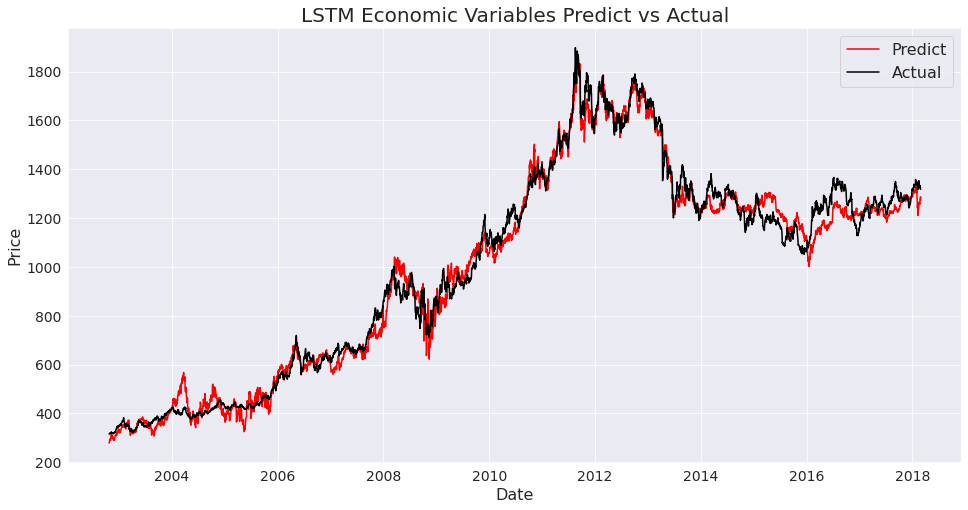

In [ ]:
validate_train_result(LSTM_E1, "LSTM Economic Variables",X_train_EL)

In [ ]:
# validate_test_result(LSTM_E, "LSTM Economic Variables",X_test_EL)

#### TECHNICAL INDICATOR

In [ ]:
test_result(LSTM_T1, "LSTM Technical Indicator",X_test_TL)

30/30 [==============================] - 1s 4ms/step
MAE:  0.01877167001440605
MSE:  0.0006426167971986924
RMSE:  0.025349887518462334
R2:  0.9685388702664921


In [ ]:
test_result(LSTM_T2, "LSTM Technical Indicator",X_test_TL)

30/30 [==============================] - 1s 6ms/step
MAE:  0.025079364075371886
MSE:  0.00114472543952375
RMSE:  0.03383379138559186
R2:  0.9439567161656869


In [ ]:
test_result(LSTM_T3, "LSTM Technical Indicator",X_test_TL)

30/30 [==============================] - 1s 11ms/step
MAE:  0.02176189533473798
MSE:  0.0008708812822063045
RMSE:  0.02951069775871632
R2:  0.9573635343467303


In [ ]:
test_result(LSTM_T4, "LSTM Technical Indicator",X_test_TL)

30/30 [==============================] - 1s 19ms/step
MAE:  0.015290773016390919
MSE:  0.00045807020447609825
RMSE:  0.021402574716049894
R2:  0.9775738726517895


In [ ]:
test_result(LSTM_T5, "LSTM Technical Indicator",X_test_TL)

30/30 [==============================] - 1s 7ms/step
MAE:  0.017539087358831272
MSE:  0.0005183299299234533
RMSE:  0.022766860344005567
R2:  0.9746236867116318


In [ ]:
test_result(LSTM_T6, "LSTM Technical Indicator",X_test_TL)

30/30 [==============================] - 1s 9ms/step
MAE:  0.016833931064261964
MSE:  0.0005185705776648507
RMSE:  0.022772144775247912
R2:  0.9746119051182387


In [ ]:
test_result(LSTM_T7, "LSTM Technical Indicator",X_test_TL)

30/30 [==============================] - 2s 15ms/step
MAE:  0.01972299529870487
MSE:  0.0006959974745429215
RMSE:  0.02638176405290066
R2:  0.9659254676562425


In [ ]:
test_result(LSTM_T8, "LSTM Technical Indicator",X_test_TL)

30/30 [==============================] - 2s 23ms/step
MAE:  0.018304343672672342
MSE:  0.0005995937525413087
RMSE:  0.02448660353216241
R2:  0.9706451855626327


In [ ]:
# validate_train_result(LSTM_T, "LSTM Technical Indicator",X_train_TL)

In [ ]:
# validate_test_result(LSTM_T, "LSTM Technical Indicator",X_test_TL)

#### ALL VARIABLES

In [ ]:
test_result(LSTM_A1, "LSTM All Variables",X_test_AL)

30/30 [==============================] - 1s 6ms/step
MAE:  0.02621701076489651
MSE:  0.0011943691560279178
RMSE:  0.03455964635276116
R2:  0.9415262670828127


In [ ]:
test_result(LSTM_A2, "LSTM All Variables",X_test_AL)

30/30 [==============================] - 1s 8ms/step
MAE:  0.022869559161418137
MSE:  0.0010048058073441413
RMSE:  0.03169867201231215
R2:  0.9508068789990533


In [ ]:
test_result(LSTM_A3, "LSTM All Variables",X_test_AL)

30/30 [==============================] - 1s 19ms/step
MAE:  0.02665718550157615
MSE:  0.001228053376937571
RMSE:  0.035043592523278363
R2:  0.9398771604167088


In [ ]:
test_result(LSTM_A4, "LSTM All Variables",X_test_AL)

30/30 [==============================] - 2s 28ms/step
MAE:  0.0303038684832714
MSE:  0.0015718881228152946
RMSE:  0.03964704431373535
R2:  0.9230437542653254


In [ ]:
test_result(LSTM_A5, "LSTM All Variables",X_test_AL)

30/30 [==============================] - 1s 10ms/step
MAE:  0.032092921676720336
MSE:  0.0018728190848742
RMSE:  0.0432760798233181
R2:  0.908310824657142


In [ ]:
test_result(LSTM_A6, "LSTM All Variables",X_test_AL)

30/30 [==============================] - 2s 14ms/step
MAE:  0.06460351815442927
MSE:  0.008104512305843282
RMSE:  0.09002506487552943
R2:  0.603220590883326


In [ ]:
test_result(LSTM_A7, "LSTM All Variables",X_test_AL)

30/30 [==============================] - 2s 26ms/step
MAE:  0.04214636661603674
MSE:  0.002842583706682599
RMSE:  0.053315886062998134
R2:  0.8608332443780713


In [ ]:
test_result(LSTM_A8, "LSTM All Variables",X_test_AL)

30/30 [==============================] - 3s 40ms/step
MAE:  0.028580915145096288
MSE:  0.0013870767731820378
RMSE:  0.03724347960626179
R2:  0.9320917185768446


In [ ]:
# validate_train_result(LSTM_A, "LSTM All Variables",X_train_AL)

In [ ]:
# validate_test_result(LSTM_A, "LSTM All Variables",X_test_AL)

### M5P

In [ ]:
test_result(m5p_E1, 'M5P Economic Variables',X_test_E)

MAE:  0.05619756632318143
MSE:  0.006351565262051154
RMSE:  0.07969670797499201
R2:  0.6890410901312805


In [ ]:
test_result(m5p_E2, 'M5P Economic Variables',X_test_E)

MAE:  0.26782459381289925
MSE:  0.08037220513483868
RMSE:  0.2834999208727203
R2:  -2.934849483763874


In [ ]:
test_result(m5p_E3, 'M5P Economic Variables',X_test_E)

MAE:  0.2622921521494525
MSE:  0.07557362981146919
RMSE:  0.27490658379069277
R2:  -2.6999216053725177


In [ ]:
test_result(m5p_E4, 'M5P Economic Variables',X_test_E)

MAE:  0.22724316365197622
MSE:  0.05898613728981609
RMSE:  0.2428706184160943
R2:  -1.8878338161142416


In [ ]:
test_result(m5p_E5, 'M5P Economic Variables',X_test_E)

MAE:  0.23445762593549818
MSE:  0.061023035589216304
RMSE:  0.24702841049000074
R2:  -1.9875559552347006


In [ ]:
# validate_train_result(m5p_E, 'M5P Economic Variables',X_train_E)

In [ ]:
# validate_test_result(m5p_E, 'M5P Economic Variables',X_test_E)

In [ ]:
test_result(m5p_T1, 'M5P Technical Indicator',X_test_T)

MAE:  0.02486432506565768
MSE:  0.0010785658710389143
RMSE:  0.03284152662467009
R2:  0.9471957456717437


In [ ]:
test_result(m5p_T2, 'M5P Technical Indicator',X_test_T)

MAE:  0.02476675401333625
MSE:  0.0011041226425516676
RMSE:  0.03322834095394574
R2:  0.9459445413651689


In [ ]:
test_result(m5p_T3, 'M5P Technical Indicator',X_test_T)

MAE:  0.016718311360978535
MSE:  0.0005169849961908397
RMSE:  0.02273730406602418
R2:  0.9746895317608574


In [ ]:
test_result(m5p_T4, 'M5P Technical Indicator',X_test_T)

MAE:  0.04160510945183863
MSE:  0.003410364357276453
RMSE:  0.05839832495265984
R2:  0.8330359306657973


In [ ]:
test_result(m5p_T5, 'M5P Technical Indicator',X_test_T)

MAE:  0.036295902969606164
MSE:  0.0026503003205013234
RMSE:  0.05148106759286683
R2:  0.8702470234523472


In [ ]:
# validate_train_result(m5p_T, 'M5P Technical Indicator',X_train_T)

In [ ]:
# validate_test_result(m5p_T, 'M5P Technical Indicator',X_test_T)

In [ ]:
test_result(m5p_A1, 'M5P All Variable',X_test_A)

MAE:  0.02488678173487933
MSE:  0.0011545323194263313
RMSE:  0.033978409607077424
R2:  0.9434765925177508


In [ ]:
test_result(m5p_A2, 'M5P All Variable',X_test_A)

MAE:  0.02476675401333625
MSE:  0.0011041226425516676
RMSE:  0.03322834095394574
R2:  0.9459445413651689


In [ ]:
test_result(m5p_A3, 'M5P All Variable',X_test_A)

MAE:  0.024719543570603103
MSE:  0.0010225874561502727
RMSE:  0.031977921385704114
R2:  0.9499363278986088


In [ ]:
test_result(m5p_A4, 'M5P All Variable',X_test_A)

MAE:  0.04473305191624389
MSE:  0.0038424783727205266
RMSE:  0.06198772759765054
R2:  0.8118805622427874


In [ ]:
test_result(m5p_A5, 'M5P All Variable',X_test_A)

MAE:  0.03815511570745447
MSE:  0.0027078953388796237
RMSE:  0.05203744170190944
R2:  0.8674272958120142


In [ ]:
# validate_train_result(m5p_A, 'M5P All Variable',X_train_A)

In [ ]:
# validate_test_result(m5p_A, 'M5P All Variable',X_test_A)

#### 1. Benchmark Model :
 

I will use Decision Tree Regressor with default parameter as my Benchmark model for the project.

In [ ]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(random_state=0)

benchmark_dt=dt.fit(X_train_E, y_train)

test_result(benchmark_dt, 'Decision Tree Regression',X_test_E)

MAE:  0.2516261568298647
MSE:  0.06855504822723163
RMSE:  0.2618301896787909
R2:  -2.3563070177528394


In [ ]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(random_state=0)

benchmark_dt=dt.fit(X_train_T, y_train)

test_result(benchmark_dt, 'Decision Tree Regression',X_test_T)

MAE:  0.04704997185619054
MSE:  0.0037745192890875985
RMSE:  0.06143711654275125
R2:  0.8152076921218477


In [ ]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(random_state=0)

benchmark_dt=dt.fit(X_train_A, y_train)

test_result(benchmark_dt, 'Decision Tree Regression',X_test_A)

MAE:  0.044630586815730046
MSE:  0.003333941065217936
RMSE:  0.057740289791599904
R2:  0.8367774498987148


Support Vector Regressor (SVR)

In [ ]:
# Save all soultion models
solution_models = {}
# SVR with  linear Kernel
svr_lin = SVR(kernel='linear')
linear_svr_clf_feat = svr_lin.fit(X_train_E,y_train)
test_result(linear_svr_clf_feat,'Linear SVR All Feat',X_test_E)

MAE:  0.08467273044695854
MSE:  0.008379645588756108
RMSE:  0.09154040413258022
R2:  0.5897506598988579


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [ ]:
# Save all soultion models
solution_models = {}
# SVR with  linear Kernel
svr_lin = SVR(kernel='linear')
linear_svr_clf_feat = svr_lin.fit(X_train_T,y_train)
test_result(linear_svr_clf_feat,'Linear SVR All Feat',X_test_T)

MAE:  0.02066549449780649
MSE:  0.0007842409351213058
RMSE:  0.028004302082382016
R2:  0.9616052585152856


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [ ]:
# Save all soultion models
solution_models = {}
# SVR with  linear Kernel
svr_lin = SVR(kernel='linear')
linear_svr_clf_feat = svr_lin.fit(X_train_A,y_train)
test_result(linear_svr_clf_feat,'Linear SVR All Feat',X_test_A)

MAE:  0.07682221850147414
MSE:  0.006984645898417664
RMSE:  0.08357419397408308
R2:  0.65804683022503


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



#### Hyperparameter Tuning
In this step I will tune two parameters of SVR C and epsilon to see if the model shows any improvemen

In [ ]:
y_train.shape

(3830, 1)

In [ ]:
linear_svr_parameters = {
    'C':[0.5, 1.0, 10.0, 50.0],
    'epsilon':[0, 0.1, 0.5, 0.7, 0.9],
}

lsvr_grid_search_feat = GridSearchCV(estimator=linear_svr_clf_feat,
                           param_grid=linear_svr_parameters,
                           cv=10,
)

y_train2= y_train.reshape(-1)
lsvr_grid_search_feat.fit(X_train_E, y_train2)

test_result(lsvr_grid_search_feat,'Linear SVR GS All Feat',X_test_E)

MAE:  0.07977014158218863
MSE:  0.010205280233512855
RMSE:  0.10102118705258246
R2:  0.5003715327813331


In [ ]:
linear_svr_parameters = {
    'C':[0.5, 1.0, 10.0, 50.0],
    'epsilon':[0, 0.1, 0.5, 0.7, 0.9],
}

lsvr_grid_search_feat = GridSearchCV(estimator=linear_svr_clf_feat,
                           param_grid=linear_svr_parameters,
                           cv=10,
)

y_train2= y_train.reshape(-1)
lsvr_grid_search_feat.fit(X_train_T, y_train2)

test_result(lsvr_grid_search_feat,'Linear SVR GS All Feat',X_test_T)

MAE:  0.015481804442633511
MSE:  0.0004736868961116891
RMSE:  0.02176434920027909
R2:  0.9768093131760689


In [ ]:
linear_svr_parameters = {
    'C':[0.5, 1.0, 10.0, 50.0],
    'epsilon':[0, 0.1, 0.5, 0.7, 0.9],
}

lsvr_grid_search_feat = GridSearchCV(estimator=linear_svr_clf_feat,
                           param_grid=linear_svr_parameters,
                           cv=10,
)

y_train2= y_train.reshape(-1)
lsvr_grid_search_feat.fit(X_train_A, y_train2)

test_result(lsvr_grid_search_feat,'Linear SVR GS All Feat',X_test_A)

MAE:  0.0194310834367186
MSE:  0.0006842752418757299
RMSE:  0.026158655200061984
R2:  0.9664993628365686


### Solution Model : Random Forest

In [ ]:
rf_cl = RandomForestRegressor(n_estimators=50, random_state=0)
random_forest_clf_feat = rf_cl.fit(X_train_E,y_train)
test_result(random_forest_clf_feat,'Random Forest with All feat',X_test_E)

random_forest_parameters = {
    'n_estimators':[10,15,20, 50, 100],
    'max_features':['auto','sqrt','log2'],
    'max_depth':[2, 3, 5, 7,10],
}

grid_search_RF_feat = GridSearchCV(estimator=random_forest_clf_feat,
                           param_grid=random_forest_parameters,
                           cv=10,
)

grid_search_RF_feat.fit(X_train_E, y_train2)

print(grid_search_RF_feat.best_params_)
test_result(grid_search_RF_feat,'RandomForest GS',X_test_E)

<ipython-input-69-c270bf9d5536>:2: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



MAE:  0.22079225830734864
MSE:  0.05322421312903557
RMSE:  0.23070373453638668
R2:  -1.6057424603837753
{'max_depth': 7, 'max_features': 'sqrt', 'n_estimators': 15}
MAE:  0.15870372638303537
MSE:  0.03582941313037428
RMSE:  0.18928658993804678
R2:  -0.7541306415954512


In [ ]:
rf_cl = RandomForestRegressor(n_estimators=50, random_state=0)
random_forest_clf_feat = rf_cl.fit(X_train_T,y_train)
test_result(random_forest_clf_feat,'Random Forest with All feat',X_test_T)

random_forest_parameters = {
    'n_estimators':[10,15,20, 50, 100],
    'max_features':['auto','sqrt','log2'],
    'max_depth':[2, 3, 5, 7,10],
}

grid_search_RF_feat = GridSearchCV(estimator=random_forest_clf_feat,
                           param_grid=random_forest_parameters,
                           cv=10,
)

grid_search_RF_feat.fit(X_train_T, y_train2)

print(grid_search_RF_feat.best_params_)
test_result(grid_search_RF_feat,'RandomForest GS',X_test_T)

<ipython-input-70-a55e1dc300c7>:2: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



MAE:  0.04164503515863415
MSE:  0.0033391432057540333
RMSE:  0.05778531998487188
R2:  0.8365227643395892
{'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 100}
MAE:  0.04316347943819036
MSE:  0.003642216280328955
RMSE:  0.060350776965412425
R2:  0.8216849615316016


In [ ]:
rf_cl = RandomForestRegressor(n_estimators=50, random_state=0)
random_forest_clf_feat = rf_cl.fit(X_train_A,y_train)
test_result(random_forest_clf_feat,'Random Forest with All feat',X_test_A)

random_forest_parameters = {
    'n_estimators':[10,15,20, 50, 100],
    'max_features':['auto','sqrt','log2'],
    'max_depth':[2, 3, 5, 7,10],
}

grid_search_RF_feat = GridSearchCV(estimator=random_forest_clf_feat,
                           param_grid=random_forest_parameters,
                           cv=10,
)

grid_search_RF_feat.fit(X_train_A, y_train2)

print(grid_search_RF_feat.best_params_)
test_result(grid_search_RF_feat,'RandomForest GS',X_test_A)

<ipython-input-71-f8691bc792db>:2: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



MAE:  0.04490521096357885
MSE:  0.003644785357789873
RMSE:  0.060372057756795675
R2:  0.8215591850507413
{'max_depth': 7, 'max_features': 'auto', 'n_estimators': 10}
MAE:  0.0475207806824864
MSE:  0.004120173664924921
RMSE:  0.06418857892900356
R2:  0.7982852008197563


### Solution Model : Gradient Boosting Regressor

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
regr =GradientBoostingRegressor(n_estimators=70, learning_rate=0.1,max_depth=4, random_state=0, loss='ls')
GB_feat = regr.fit(X_train_E,y_train)
test_result(GB_feat,'NB',X_test_E)
solution_models['GB All Feat'] = GB_feat

/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_gb.py:286: FutureWarning:

The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.



MAE:  0.17234001247407144
MSE:  0.03588415654764315
RMSE:  0.18943113932942268
R2:  -0.75681076100761


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
regr =GradientBoostingRegressor(n_estimators=70, learning_rate=0.1,max_depth=4, random_state=0, loss='ls')
GB_feat = regr.fit(X_train_T,y_train)
test_result(GB_feat,'NB',X_test_T)
solution_models['GB All Feat'] = GB_feat

/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_gb.py:286: FutureWarning:

The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.



MAE:  0.04634294391555555
MSE:  0.004299192771794928
RMSE:  0.06556822989676424
R2:  0.7895208121972277


NameError: ignored

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
regr =GradientBoostingRegressor(n_estimators=70, learning_rate=0.1,max_depth=4, random_state=0, loss='ls')
GB_feat = regr.fit(X_train_A,y_train)
test_result(GB_feat,'NB',X_test_A)
solution_models['GB All Feat'] = GB_feat

/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_gb.py:286: FutureWarning:

The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.



MAE:  0.07133962518391476
MSE:  0.008857812137288383
RMSE:  0.09411595049346515
R2:  0.5663406589726819


NameError: ignored

## LSTM1

In [ ]:
from numpy import loadtxt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
# from keras.models import Sequential
# from keras.layers import Dense, LSTM

LSTMmdl = Sequential()
LSTMmdl.add(LSTM(128, return_sequences = True, input_shape = (10, 1)))
LSTMmdl.add(LSTM(64, return_sequences = False))
# LSTMmdl.add(Dense(10))
LSTMmdl.add(Dense(1))

LSTMmdl.compile(optimizer = "adam", loss = "mean_squared_error")

LSTMmdl.fit(X_train_EL, y_train,validation_data=(X_test_EL,y_test), batch_size = 300, epochs = 100)
test_result(LSTMmdl,'LSTMM',X_test_EL)